# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [2]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=';')

C:\Users\keiss01\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!

In [4]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [5]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


**Cleaning**

Handle the 'DtypeWarning: Columns (18,19) have mixed types' warning -<br>
saving all values in the columns as string and removing the '.0'.

In [6]:
azdias.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 366 columns):
LNR                            int64
AGER_TYP                       int64
AKT_DAT_KL                     float64
ALTER_HH                       float64
ALTER_KIND1                    float64
ALTER_KIND2                    float64
ALTER_KIND3                    float64
ALTER_KIND4                    float64
ALTERSKATEGORIE_FEIN           float64
ANZ_HAUSHALTE_AKTIV            float64
ANZ_HH_TITEL                   float64
ANZ_KINDER                     float64
ANZ_PERSONEN                   float64
ANZ_STATISTISCHE_HAUSHALTE     float64
ANZ_TITEL                      float64
ARBEIT                         float64
BALLRAUM                       float64
CAMEO_DEU_2015                 object
CAMEO_DEUG_2015                object
CAMEO_INTL_2015                object
CJT_GESAMTTYP                  float64
CJT_KATALOGNUTZER              float64
CJT_TYP_1                      float6

**Missing descriptions**

In [ ]:
provided_cols = ['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ALTER_HH', 'ANREDE_KZ', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL', 'BALLRAUM', 'BIP_FLAG', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_DEUINTL_2015', 'CJT_GESAMTTYP', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM', 'D19_BANKEN_DIREKT_RZ', 'D19_BANKEN_GROSS_RZ', 'D19_BANKEN_LOKAL_RZ', 'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_BANKEN_REST_RZ', 'D19_BEKLEIDUNG_GEH_RZ', 'D19_BEKLEIDUNG_REST_RZ', 'D19_BILDUNG_RZ', 'D19_BIO_OEKO_RZ', 'D19_BUCH_RZ', 'D19_DIGIT_SERV_RZ', 'D19_DROGERIEARTIKEL_RZ', 'D19_ENERGIE_RZ', 'D19_FREIZEIT_RZ', 'D19_GARTEN_RZ', 'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_HANDWERK_RZ', 'D19_HAUS_DEKO_RZ', 'D19_KINDERARTIKEL_RZ', 'D19_KONSUMTYP', 'D19_KK_KUNDENTYP', 'D19_KOSMETIK_RZ', 'D19_LEBENSMITTEL_RZ', 'D19_LOTTO_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_RATGEBER_RZ', 'D19_REISEN_RZ', 'D19_SAMMELARTIKEL_RZ', 'D19_SCHUHE_RZ', 'D19_SONSTIGE_RZ', 'D19_TECHNIK_RZ', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24', 'D19_TELKO_DATUM', 'D19_TELKO_MOBILE_RZ', 'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM', 'D19_TELKO_REST_RZ', 'D19_TIERARTIKEL_RZ', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM', 'D19_VERSAND_OFFLINE_DATUM', 'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSAND_REST_RZ', 'D19_VERSICHERUNGEN_RZ', 'D19_VERSI_ANZ_12', 'D19_VERSI_ANZ_24', 'D19_VOLLSORTIMENT_RZ', 'D19_WEIN_FEINKOST_RZ', 'EWDICHTE', 'FINANZTYP', 'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER', 'GEBAEUDETYP', 'GEBAEUDETYP_RASTER', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GEOSCORE_KLS7', 'GREEN_AVANTGARDE', 'HAUSHALTSSTRUKTUR', 'HEALTH_TYP', 'HH_EINKOMMEN_SCORE', 'INNENSTADT', 'KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_AUTOQUOT', 'KBA05_BAUMAX', 'KBA05_CCM1', 'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_GBZ', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_HERST3', 'KBA05_HERST4', 'KBA05_HERST5', 'KBA05_HERSTTEMP', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ', 'KBA05_MAXHERST', 'KBA05_MAXSEG', 'KBA05_MAXVORB', 'KBA05_MOD1', 'KBA05_MOD2', 'KBA05_MOD3', 'KBA05_MOD4', 'KBA05_MOD8', 'KBA05_MODTEMP', 'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1', 'KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SEG4', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8', 'KBA05_SEG9', 'KBA05_VORB0', 'KBA05_VORB1', 'KBA05_VORB2', 'KBA05_ZUL1', 'KBA05_ZUL2', 'KBA05_ZUL3', 'KBA05_ZUL4', 'KBA13_ALTERHALTER_30', 'KBA13_ALTERHALTER_45', 'KBA13_ALTERHALTER_60', 'KBA13_ALTERHALTER_61', 'KBA13_ANZAHL_PKW', 'KBA13_AUDI', 'KBA13_AUTOQUOTE', 'KBA13_BJ_1999', 'KBA13_BJ_2000', 'KBA13_BJ_2004', 'KBA13_BJ_2006', 'KBA13_BJ_2008', 'KBA13_BJ_2009', 'KBA13_BMW', 'KBA13_CCM_1000', 'KBA13_CCM_1200', 'KBA13_CCM_1400', 'KBA13_CCM_0_1400', 'KBA13_CCM_1500', 'KBA13_CCM_1400_2500', 'KBA13_CCM_1600', 'KBA13_CCM_1800', 'KBA13_CCM_2000', 'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000', 'KBA13_CCM_3001', 'KBA13_FAB_ASIEN', 'KBA13_FAB_SONSTIGE', 'KBA13_FIAT', 'KBA13_FORD', 'KBA13_HALTER_20', 'KBA13_HALTER_25', 'KBA13_HALTER_30', 'KBA13_HALTER_35', 'KBA13_HALTER_40', 'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55', 'KBA13_HALTER_60', 'KBA13_HALTER_65', 'KBA13_HALTER_66', 'KBA13_HERST_ASIEN', 'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ', 'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_HERST_SONST', 'KBA13_KMH_110', 'KBA13_KMH_140', 'KBA13_KMH_180', 'KBA13_KMH_0_140', 'KBA13_KMH_140_210', 'KBA13_KMH_211', 'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSAQUOT', 'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ', 'KBA13_KRSHERST_FORD_OPEL', 'KBA13_KRSSEG_KLEIN', 'KBA13_KRSSEG_OBER', 'KBA13_KRSSEG_VAN', 'KBA13_KRSZUL_NEU', 'KBA13_KW_30', 'KBA13_KW_40', 'KBA13_KW_50', 'KBA13_KW_60', 'KBA13_KW_0_60', 'KBA13_KW_70', 'KBA13_KW_61_120', 'KBA13_KW_80', 'KBA13_KW_90', 'KBA13_KW_110', 'KBA13_KW_120', 'KBA13_KW_121', 'KBA13_MAZDA', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_NISSAN', 'KBA13_OPEL', 'KBA13_PEUGEOT', 'KBA13_RENAULT', 'KBA13_SEG_GELAENDEWAGEN', 'KBA13_SEG_GROSSRAUMVANS', 'KBA13_SEG_KLEINST', 'KBA13_SEG_KLEINWAGEN', 'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_SEG_MINIVANS', 'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_MITTELKLASSE', 'KBA13_SEG_OBEREMITTELKLASSE', 'KBA13_SEG_OBERKLASSE', 'KBA13_SEG_SONSTIGE', 'KBA13_SEG_SPORTWAGEN', 'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SEG_WOHNMOBILE', 'KBA13_SITZE_4', 'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_TOYOTA', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2', 'KBA13_VORB_2', 'KBA13_VORB_3', 'KBA13_VW', 'KKK', 'KONSUMNAEHE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'MIN_GEBAEUDEJAHR', 'MOBI_REGIO', 'NATIONALITAET_KZ', 'ONLINE_AFFINITAET', 'ORTSGR_KLS9', 'OST_WEST_KZ', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'PLZ8_GBZ', 'PLZ8_HHZ', 'PRAEGENDE_JUGENDJAHRE', 'REGIOTYP', 'RELAT_AB', 'RETOURTYP_BK_S', 'SEMIO_DOM', 'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 'SHOPPER_TYP', 'SOHO_FLAG', 'TITEL_KZ', 'VERS_TYP', 'WOHNDAUER_2008', 'WOHNLAGE', 'WACHSTUMSGEBIET_NB', 'W_KEIT_KIND_HH', 'ZABEOTYP']
print(len(provided_cols))
print(azdias.shape[0])
missing_descriptions = set(azdias.columns) - set(provided_cols)
print('missing:', len(missing_descriptions))
list(missing_descriptions)

**Handle unknown values and NaNs**

In [7]:
unknown_min1 = ['AGER_TYP', 'BALLRAUM', 'BIP_FLAG', 'CAMEO_DEUG_2015', 'CAMEO_DEUINTL_2015', 'D19_KK_KUNDENTYP', 'EWDICHTE', 'FINANZTYP', 'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER', 'HEALTH_TYP', 'INNENSTADT', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA13_ALTERHALTER_30', 'KBA13_ALTERHALTER_45', 'KBA13_ALTERHALTER_60', 'KBA13_ALTERHALTER_61', 'KBA13_AUDI', 'KBA13_AUTOQUOTE', 'KBA13_BJ_1999', 'KBA13_BJ_2000', 'KBA13_BJ_2004', 'KBA13_BJ_2006', 'KBA13_BJ_2008', 'KBA13_BJ_2009', 'KBA13_BMW', 'KBA13_CCM_1000', 'KBA13_CCM_1200', 'KBA13_CCM_1400', 'KBA13_CCM_0_1400', 'KBA13_CCM_1500', 'KBA13_CCM_1400_2500', 'KBA13_CCM_1600', 'KBA13_CCM_1800', 'KBA13_CCM_2000', 'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000', 'KBA13_CCM_3001', 'KBA13_FAB_ASIEN', 'KBA13_FAB_SONSTIGE', 'KBA13_FIAT', 'KBA13_FORD', 'KBA13_HALTER_20', 'KBA13_HALTER_25', 'KBA13_HALTER_30', 'KBA13_HALTER_35', 'KBA13_HALTER_40', 'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55', 'KBA13_HALTER_60', 'KBA13_HALTER_65', 'KBA13_HALTER_66', 'KBA13_HERST_ASIEN', 'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ', 'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_HERST_SONST', 'KBA13_KMH_110', 'KBA13_KMH_140', 'KBA13_KMH_180', 'KBA13_KMH_0_140', 'KBA13_KMH_140_210', 'KBA13_KMH_211', 'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSAQUOT', 'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ', 'KBA13_KRSHERST_FORD_OPEL', 'KBA13_KRSSEG_KLEIN', 'KBA13_KRSSEG_OBER', 'KBA13_KRSSEG_VAN', 'KBA13_KRSZUL_NEU', 'KBA13_KW_30', 'KBA13_KW_40', 'KBA13_KW_50', 'KBA13_KW_60', 'KBA13_KW_0_60', 'KBA13_KW_70', 'KBA13_KW_61_120', 'KBA13_KW_80', 'KBA13_KW_90', 'KBA13_KW_110', 'KBA13_KW_120', 'KBA13_KW_121', 'KBA13_MAZDA', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_NISSAN', 'KBA13_OPEL', 'KBA13_PEUGEOT', 'KBA13_RENAULT', 'KBA13_SEG_GELAENDEWAGEN', 'KBA13_SEG_GROSSRAUMVANS', 'KBA13_SEG_KLEINST', 'KBA13_SEG_KLEINWAGEN', 'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_SEG_MINIVANS', 'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_MITTELKLASSE', 'KBA13_SEG_OBEREMITTELKLASSE', 'KBA13_SEG_OBERKLASSE', 'KBA13_SEG_SONSTIGE', 'KBA13_SEG_SPORTWAGEN', 'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SEG_WOHNMOBILE', 'KBA13_SITZE_4', 'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_TOYOTA', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2', 'KBA13_VORB_2', 'KBA13_VORB_3', 'KBA13_VW', 'ORTSGR_KLS9', 'OST_WEST_KZ', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_GBZ', 'PLZ8_HHZ', 'SHOPPER_TYP', 'SOHO_FLAG', 'VERS_TYP', 'WOHNLAGE']
unknown_0 = ['ALTER_HH', 'CJT_GESAMTTYP', 'RETOURTYP_BK_S']
unknown_min1_0 = ['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GEBAEUDETYP', 'HH_EINKOMMEN_SCORE', 'KBA05_BAUMAX', 'KBA05_GBZ', 'KKK', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'REGIOTYP', 'TITEL_KZ', 'WOHNDAUER_2008', 'WACHSTUMSGEBIET_NB', 'W_KEIT_KIND_HH']
unknown_min1_9 = ['KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG', 'KBA05_CCM1', 'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_HERST3', 'KBA05_HERST4', 'KBA05_HERST5', 'KBA05_HERSTTEMP', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL', 'KBA05_KW1', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ', 'KBA05_MAXHERST', 'KBA05_MAXSEG', 'KBA05_MAXVORB', 'KBA05_MOD1', 'KBA05_MOD2', 'KBA05_MOD3', 'KBA05_MOD4', 'KBA05_MOD8', 'KBA05_MODTEMP', 'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1', 'KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SEG4', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8', 'KBA05_SEG9', 'KBA05_VORB0', 'KBA05_VORB1', 'KBA05_VORB2', 'KBA05_ZUL1', 'KBA05_ZUL2', 'KBA05_ZUL3', 'KBA05_ZUL4', 'SEMIO_DOM', 'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 'ZABEOTYP']
unknown_X = ['CAMEO_DEUG_2015']
unknown_XX = ['CAMEO_INTL_2015']

In [8]:
def repl_unknown(df, cols, vals):
    cnt = 0
    for col in cols:        
        if col in list(df.columns):
            cnt +=1
            if cnt%10 == 0:
                print(cnt, col)
            df.loc[df[col].isin(vals), col] = np.nan
    return df

In [9]:
azdias = repl_unknown(azdias, unknown_0, [0])
azdias = repl_unknown(azdias, unknown_min1, [-1])
azdias = repl_unknown(azdias, unknown_min1_0, [-1, 0])
azdias = repl_unknown(azdias, unknown_min1_9, [-1, 9])
azdias = repl_unknown(azdias, unknown_X, ['X'])
azdias = repl_unknown(azdias, unknown_XX, ['XX'])

10 FINANZ_UNAUFFAELLIGER
20 KBA13_ALTERHALTER_60
30 KBA13_BMW
40 KBA13_CCM_2501
50 KBA13_HALTER_35
60 KBA13_HERST_BMW_BENZ
70 KBA13_KMH_250
80 KBA13_KW_30
90 KBA13_KW_120
100 KBA13_SEG_GROSSRAUMVANS
110 KBA13_SEG_SPORTWAGEN
120 KBA13_VORB_1_2
130 PLZ8_GBZ
10 REGIOTYP
10 KBA05_DIESEL
20 KBA05_KRSHERST2
30 KBA05_MAXBJ
40 KBA05_MOTOR
50 KBA05_SEG8
60 SEMIO_ERL
70 SEMIO_SOZ


In [10]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0


In [11]:
azdias.columns[18:20]

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')

In [12]:
print(azdias['CAMEO_DEUG_2015'].unique())
print(azdias['CAMEO_INTL_2015'].unique())

[nan 8.0 4.0 2.0 6.0 1.0 9.0 5.0 7.0 3.0 '4' '3' '7' '2' '8' '9' '6' '5'
 '1']
[nan 51.0 24.0 12.0 43.0 54.0 22.0 14.0 13.0 15.0 33.0 41.0 34.0 55.0 25.0
 23.0 31.0 52.0 35.0 45.0 44.0 32.0 '22' '24' '41' '12' '54' '51' '44'
 '35' '23' '25' '14' '34' '52' '55' '31' '32' '15' '13' '43' '33' '45']


In [13]:
def clean_mix_types(df, mixed_cols):
    for col in mixed_cols:
        df[col] = df[col].str.replace('.0', '')
        df[col].unique()
    return df    

mixed_cols = ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']

azdias = clean_mix_types(azdias, mixed_cols)        

In [14]:
# check
print(azdias['CAMEO_DEUG_2015'].unique())
print(azdias['CAMEO_INTL_2015'].unique())

[nan '4' '3' '7' '2' '8' '9' '6' '5' '1']
[nan '22' '24' '41' '12' '54' '51' '44' '35' '23' '25' '14' '34' '52' '55'
 '31' '32' '15' '13' '43' '33' '45']


In [15]:
for col in azdias.columns:
    empty_cols_list = []
    miss_share = azdias[col].isna().mean() * 100
    if miss_share >= 50:
        print(col, miss_share)
        empty_cols_list.append(col)         

AGER_TYP 76.01964047076987
ALTER_KIND1 90.90483729624863
ALTER_KIND2 96.69004657655059
ALTER_KIND3 99.30769135826019
ALTER_KIND4 99.86479223447382
EXTSEL992 73.39963937115486
KBA05_BAUMAX 53.468668265222654
KK_KUNDENTYP 65.59674873011295
TITEL_KZ 99.75763587258379


In [16]:
azdias.drop(columns=empty_cols_list, inplace = True)

In [17]:
azdias.shape

(891221, 366)

In [18]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0


In [19]:
azdias.drop(columns='LNR', inplace = True)

In [20]:
azdias.dropna(how='all').shape

(891221, 365)

**Drop 65% empty rows**

In [21]:
len(azdias.dropna(thresh=azdias.shape[1]*.35, axis='index'))

813508

In [22]:
azdias.dropna(thresh=azdias.shape[1]*.35, axis='index', inplace = True)

In [23]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
1,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,11.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3.0,2.0,4.0
4,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0
5,3.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,5.0,0.0,...,2.0,10.0,7.0,4.0,6.0,9.0,7.0,4.0,2.0,1.0


**Fill nulls by mode values**

In [24]:
def fillna_mode(df):
    cnt = 0
    for col in df.columns:
        cnt += 1
        if cnt%10 == 0:
            print(cnt, col)
        df[col].fillna(df[col].mode()[0], inplace = True)
    return df
        
azdias = fillna_mode(azdias)

10 ANZ_HH_TITEL
20 CJT_GESAMTTYP
30 D19_BANKEN_DATUM
40 D19_BILDUNG
50 D19_GESAMT_DATUM
60 D19_LEBENSMITTEL
70 D19_TECHNIK
80 D19_VERSAND_ANZ_12
90 D19_VERSI_OFFLINE_DATUM
100 EXTSEL992
110 GEBAEUDETYP_RASTER
120 KBA05_ALTER2
130 KBA05_CCM1
140 KBA05_HERST4
150 KBA05_KRSZUL
160 KBA05_MOD2
170 KBA05_SEG3
180 KBA05_ZUL1
190 KBA13_ANTG3
200 KBA13_BJ_2008
210 KBA13_CCM_1800
220 KBA13_GBZ
230 KBA13_HALTER_65
240 KBA13_KMH_110
250 KBA13_KRSHERST_BMW_BENZ
260 KBA13_KW_30
270 KBA13_MOTOR
280 KBA13_SEG_MINIVANS
290 KBA13_SITZE_4
300 KK_KUNDENTYP
310 LP_STATUS_GROB
320 PLZ8_ANTG3
330 RT_SCHNAEPPCHEN
340 SEMIO_PFLICHT
350 UMFELD_ALT
360 W_KEIT_KIND_HH


In [25]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
1,2.0,9.0,18.0,18.0,18.0,18.0,17.0,21.0,11.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,2.0,9.0,17.0,18.0,18.0,18.0,17.0,17.0,10.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,2.0,1.0,13.0,18.0,18.0,18.0,17.0,13.0,1.0,0.0,...,0.0,7.0,10.0,11.0,6.0,9.0,7.0,3.0,2.0,4.0
4,2.0,1.0,20.0,18.0,18.0,18.0,17.0,14.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0
5,3.0,1.0,10.0,18.0,18.0,18.0,17.0,10.0,5.0,0.0,...,2.0,10.0,7.0,4.0,6.0,9.0,7.0,4.0,2.0,1.0


In [26]:
def float_to_int(df, float_cols):
    df[float_cols] = df[float_cols].astype(int)
    return df

In [27]:
float_cols = list(azdias.select_dtypes(['float64']).columns)
azdias = float_to_int(azdias, float_cols)

In [28]:
azdias.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813508 entries, 1 to 891220
Data columns (total 365 columns):
AGER_TYP                       int32
AKT_DAT_KL                     int32
ALTER_HH                       int32
ALTER_KIND1                    int32
ALTER_KIND2                    int32
ALTER_KIND3                    int32
ALTER_KIND4                    int32
ALTERSKATEGORIE_FEIN           int32
ANZ_HAUSHALTE_AKTIV            int32
ANZ_HH_TITEL                   int32
ANZ_KINDER                     int32
ANZ_PERSONEN                   int32
ANZ_STATISTISCHE_HAUSHALTE     int32
ANZ_TITEL                      int32
ARBEIT                         int32
BALLRAUM                       int32
CAMEO_DEU_2015                 object
CAMEO_DEUG_2015                object
CAMEO_INTL_2015                object
CJT_GESAMTTYP                  int32
CJT_KATALOGNUTZER              int32
CJT_TYP_1                      int32
CJT_TYP_2                      int32
CJT_TYP_3                      int

In [29]:
obj_cols = list(azdias.select_dtypes(['object']).columns)

In [30]:
for col in obj_cols:
    print(col, azdias[col].unique())

CAMEO_DEU_2015 ['8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C' 'XX']
CAMEO_DEUG_2015 ['8' '4' '3' '7' '2' '9' '6' '5' '1']
CAMEO_INTL_2015 ['51' '22' '24' '41' '12' '54' '44' '35' '23' '25' '14' '34' '52' '55'
 '31' '32' '15' '13' '43' '33' '45']
D19_LETZTER_KAUF_BRANCHE ['D19_UNBEKANNT' 'D19_SCHUHE' 'D19_ENERGIE' 'D19_KOSMETIK'
 'D19_VOLLSORTIMENT' 'D19_SONSTIGE' 'D19_BANKEN_GROSS'
 'D19_DROGERIEARTIKEL' 'D19_HANDWERK' 'D19_BUCH_CD' 'D19_VERSICHERUNGEN'
 'D19_VERSAND_REST' 'D19_TELKO_REST' 'D19_BANKEN_DIREKT' 'D19_BANKEN_REST'
 'D19_FREIZEIT' 'D19_LEBENSMITTEL' 'D19_HAUS_DEKO' 'D19_BEKLEIDUNG_REST'
 'D19_SAMMELARTIKEL' 'D19_TELKO_MOBILE' 'D19_REISEN' 'D19_BEKLEIDUNG_GEH'
 'D19_TECHNIK' 'D19_NAHRUNGSERGAENZUNG' 'D19_DIGIT_SERV' 'D19_LOTTO'
 'D19_RATGEBER' 'D19_TIERARTIKEL' 'D19_KINDERARTIKEL' 'D19_BIO_OEKO'
 'D19

In [31]:
azdias[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']].head()

,CAMEO_DEUG_2015,CAMEO_INTL_2015
1,8,51
2,8,51
3,8,51
4,8,51
5,8,51


In [32]:
azdias[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']] = azdias[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']].astype(int)

**Encode categorical data**

In [33]:
def conv_cat_cols(df, cat_cols):    
    for col in cat_cols:
        col_cat = col+'_cat'
        df[col] = df[col].astype('category')
        df[col_cat] = df[col].cat.codes
    return df    

In [34]:
cat_cols = ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'OST_WEST_KZ']
azdias = conv_cat_cols(azdias, cat_cols)

In [35]:
azdias[['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'CAMEO_DEU_2015_cat', 'D19_LETZTER_KAUF_BRANCHE_cat']].head()

,CAMEO_DEU_2015,D19_LETZTER_KAUF_BRANCHE,CAMEO_DEU_2015_cat,D19_LETZTER_KAUF_BRANCHE_cat
1,8A,D19_UNBEKANNT,35,30
2,4C,D19_UNBEKANNT,15,30
3,2A,D19_UNBEKANNT,5,30
4,6B,D19_SCHUHE,25,24
5,8C,D19_ENERGIE,37,11


In [36]:
CAMEO_DEU_2015_dict = dict(enumerate(azdias['CAMEO_DEU_2015'].cat.categories))
D19_LETZTER_KAUF_BRANCHE_dict = dict(enumerate(azdias['D19_LETZTER_KAUF_BRANCHE'].cat.categories))

**Repeat for Customers**

In [37]:
set(customers.columns) - set(azdias.columns)

{'CUSTOMER_GROUP', 'LNR', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

In [38]:
set(azdias.columns) - set(customers.columns)

{'CAMEO_DEU_2015_cat', 'D19_LETZTER_KAUF_BRANCHE_cat'}

In [39]:
azdias.columns[:-2]

Index(['AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1', 'ALTER_KIND2',
       'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL',
       ...
       'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB'],
      dtype='object', length=365)

In [40]:
customers = customers[azdias.columns[:-2]]

In [41]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 365 columns):
AGER_TYP                       int64
AKT_DAT_KL                     float64
ALTER_HH                       float64
ALTER_KIND1                    float64
ALTER_KIND2                    float64
ALTER_KIND3                    float64
ALTER_KIND4                    float64
ALTERSKATEGORIE_FEIN           float64
ANZ_HAUSHALTE_AKTIV            float64
ANZ_HH_TITEL                   float64
ANZ_KINDER                     float64
ANZ_PERSONEN                   float64
ANZ_STATISTISCHE_HAUSHALTE     float64
ANZ_TITEL                      float64
ARBEIT                         float64
BALLRAUM                       float64
CAMEO_DEU_2015                 object
CAMEO_DEUG_2015                object
CAMEO_INTL_2015                object
CJT_GESAMTTYP                  float64
CJT_KATALOGNUTZER              float64
CJT_TYP_1                      float64
CJT_TYP_2                      floa

In [42]:
mixed_cols = ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']
customers = clean_mix_types(customers, mixed_cols)        

In [43]:
print(customers['CAMEO_DEUG_2015'].unique())
print(customers['CAMEO_INTL_2015'].unique())

[nan '6' '3' '8' '9' '2' '4' '1' '7' '5' 'X']
[nan '45' '25' '55' '51' '14' '54' '43' '22' '15' '24' '35' '23' '12' '44'
 '41' '52' '31' '13' '34' '32' '33' 'XX']


In [44]:
customers = repl_unknown(customers, unknown_0, [0])
customers = repl_unknown(customers, unknown_min1, [-1])
customers = repl_unknown(customers, unknown_min1_0, [-1, 0])
customers = repl_unknown(customers, unknown_min1_9, [-1, 9])
customers = repl_unknown(customers, unknown_X, ['X'])
customers = repl_unknown(customers, unknown_XX, ['XX'])

10 FINANZ_UNAUFFAELLIGER
20 KBA13_ALTERHALTER_60
30 KBA13_BMW
40 KBA13_CCM_2501
50 KBA13_HALTER_35
60 KBA13_HERST_BMW_BENZ
70 KBA13_KMH_250
80 KBA13_KW_30
90 KBA13_KW_120
100 KBA13_SEG_GROSSRAUMVANS
110 KBA13_SEG_SPORTWAGEN
120 KBA13_VORB_1_2
130 PLZ8_GBZ
10 REGIOTYP
10 KBA05_DIESEL
20 KBA05_KRSHERST2
30 KBA05_MAXBJ
40 KBA05_MOTOR
50 KBA05_SEG8
60 SEMIO_ERL
70 SEMIO_SOZ


In [45]:
customers.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,3.0,5.0,3.0,2.0,6.0,9.0,7.0,3.0,1.0,4.0
1,NaN,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,3.0,NaN,9.0,NaN,3.0,1.0,4.0
2,NaN,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,4.0,10.0,13.0,11.0,6.0,9.0,2.0,3.0,2.0,4.0
3,1.0,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,NaN,...,2.0,6.0,4.0,2.0,NaN,9.0,7.0,1.0,1.0,4.0
4,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,0.0,...,4.0,3.0,5.0,4.0,2.0,9.0,3.0,1.0,1.0,3.0


In [46]:
len(customers.dropna(thresh=azdias.shape[1]*.35, axis='index'))

144941

In [47]:
customers.shape

(191652, 365)

In [48]:
customers.dropna(thresh=azdias.shape[1]*.35, axis='index', inplace = True)

In [49]:
customers.shape

(144941, 365)

In [50]:
customers.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,3.0,5.0,3.0,2.0,6.0,9.0,7.0,3.0,1.0,4.0
2,NaN,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,4.0,10.0,13.0,11.0,6.0,9.0,2.0,3.0,2.0,4.0
3,1.0,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,NaN,...,2.0,6.0,4.0,2.0,NaN,9.0,7.0,1.0,1.0,4.0
4,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,0.0,...,4.0,3.0,5.0,4.0,2.0,9.0,3.0,1.0,1.0,3.0
5,1.0,1.0,11.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,4.0,1.0,2.0,1.0,6.0,9.0,1.0,2.0,1.0,3.0


In [51]:
customers = fillna_mode(customers)

10 ANZ_HH_TITEL
20 CJT_GESAMTTYP
30 D19_BANKEN_DATUM
40 D19_BILDUNG
50 D19_GESAMT_DATUM
60 D19_LEBENSMITTEL
70 D19_TECHNIK
80 D19_VERSAND_ANZ_12
90 D19_VERSI_OFFLINE_DATUM
100 EXTSEL992
110 GEBAEUDETYP_RASTER
120 KBA05_ALTER2
130 KBA05_CCM1
140 KBA05_HERST4
150 KBA05_KRSZUL
160 KBA05_MOD2
170 KBA05_SEG3
180 KBA05_ZUL1
190 KBA13_ANTG3
200 KBA13_BJ_2008
210 KBA13_CCM_1800
220 KBA13_GBZ
230 KBA13_HALTER_65
240 KBA13_KMH_110
250 KBA13_KRSHERST_BMW_BENZ
260 KBA13_KW_30
270 KBA13_MOTOR
280 KBA13_SEG_MINIVANS
290 KBA13_SITZE_4
300 KK_KUNDENTYP
310 LP_STATUS_GROB
320 PLZ8_ANTG3
330 RT_SCHNAEPPCHEN
340 SEMIO_PFLICHT
350 UMFELD_ALT
360 W_KEIT_KIND_HH


In [52]:
float_cols = list(customers.select_dtypes(['float64']).columns)
customers = float_to_int(customers, float_cols)

In [53]:
customers.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1,10,18,18,18,18,10,1,0,...,3,5,3,2,6,9,7,3,1,4
2,2,1,6,18,18,18,18,0,1,0,...,4,10,13,11,6,9,2,3,2,4
3,1,1,8,18,18,18,18,8,0,0,...,2,6,4,2,6,9,7,1,1,4
4,2,1,20,18,18,18,18,14,7,0,...,4,3,5,4,2,9,3,1,1,3
5,1,1,11,18,18,18,18,10,1,0,...,4,1,2,1,6,9,1,2,1,3


In [54]:
customers[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']] = customers[['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']].astype(int)

In [55]:
cat_cols = ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE']
customers = conv_cat_cols(customers, cat_cols)

In [56]:
customers[['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'CAMEO_DEU_2015_cat', 'D19_LETZTER_KAUF_BRANCHE_cat']].head()

,CAMEO_DEU_2015,D19_LETZTER_KAUF_BRANCHE,CAMEO_DEU_2015_cat,D19_LETZTER_KAUF_BRANCHE_cat
0,1A,D19_UNBEKANNT,0,30
2,5D,D19_UNBEKANNT,21,30
3,4C,D19_NAHRUNGSERGAENZUNG,15,20
4,7B,D19_SCHUHE,31,24
5,5D,D19_BUCH_CD,21,8


In [57]:
print(CAMEO_DEU_2015_dict)
print(D19_LETZTER_KAUF_BRANCHE_dict)

{0: '1A', 1: '1B', 2: '1C', 3: '1D', 4: '1E', 5: '2A', 6: '2B', 7: '2C', 8: '2D', 9: '3A', 10: '3B', 11: '3C', 12: '3D', 13: '4A', 14: '4B', 15: '4C', 16: '4D', 17: '4E', 18: '5A', 19: '5B', 20: '5C', 21: '5D', 22: '5E', 23: '5F', 24: '6A', 25: '6B', 26: '6C', 27: '6D', 28: '6E', 29: '6F', 30: '7A', 31: '7B', 32: '7C', 33: '7D', 34: '7E', 35: '8A', 36: '8B', 37: '8C', 38: '8D', 39: '9A', 40: '9B', 41: '9C', 42: '9D', 43: '9E', 44: 'XX'}
{0: 'D19_BANKEN_DIREKT', 1: 'D19_BANKEN_GROSS', 2: 'D19_BANKEN_LOKAL', 3: 'D19_BANKEN_REST', 4: 'D19_BEKLEIDUNG_GEH', 5: 'D19_BEKLEIDUNG_REST', 6: 'D19_BILDUNG', 7: 'D19_BIO_OEKO', 8: 'D19_BUCH_CD', 9: 'D19_DIGIT_SERV', 10: 'D19_DROGERIEARTIKEL', 11: 'D19_ENERGIE', 12: 'D19_FREIZEIT', 13: 'D19_GARTEN', 14: 'D19_HANDWERK', 15: 'D19_HAUS_DEKO', 16: 'D19_KINDERARTIKEL', 17: 'D19_KOSMETIK', 18: 'D19_LEBENSMITTEL', 19: 'D19_LOTTO', 20: 'D19_NAHRUNGSERGAENZUNG', 21: 'D19_RATGEBER', 22: 'D19_REISEN', 23: 'D19_SAMMELARTIKEL', 24: 'D19_SCHUHE', 25: 'D19_SONSTIGE

In [66]:
azdias.drop(columns=['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE','EINGEFUEGT_AM'], inplace = True)
customers.drop(columns=['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE','EINGEFUEGT_AM'], inplace = True)

In [72]:
azdias.drop(columns=['OST_WEST_KZ'], inplace = True)
customers.drop(columns=['OST_WEST_KZ'], inplace = True)

**Save cleaned dataset**

In [73]:
azdias.to_csv('azdias_clean.csv', index = False)
customers.to_csv('customers_clean.csv', index = False)

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
azdias_clean = pd.read_csv('azdias_clean.csv')
customers_clean = pd.read_csv('customers_clean.csv')

In [3]:
azdias_clean.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CAMEO_DEU_2015_cat,D19_LETZTER_KAUF_BRANCHE_cat
0,2,9,18,18,18,18,17,21,11,0,...,11,10,3,9,4,5,2,1,35,30
1,2,9,17,18,18,18,17,17,10,0,...,9,6,3,9,2,5,2,3,15,30
2,2,1,13,18,18,18,17,13,1,0,...,10,11,6,9,7,3,2,4,5,30
3,2,1,20,18,18,18,17,14,3,0,...,5,4,2,9,3,4,1,3,25,24
4,3,1,10,18,18,18,17,10,5,0,...,7,4,6,9,7,4,2,1,37,11


In [4]:
customers_clean.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CAMEO_DEU_2015_cat,D19_LETZTER_KAUF_BRANCHE_cat
0,2,1,10,18,18,18,18,10,1,0,...,3,2,6,9,7,3,1,4,0,30
1,2,1,6,18,18,18,18,0,1,0,...,13,11,6,9,2,3,2,4,21,30
2,1,1,8,18,18,18,18,8,0,0,...,4,2,6,9,7,1,1,4,15,20
3,2,1,20,18,18,18,18,14,7,0,...,5,4,2,9,3,1,1,3,31,24
4,1,1,11,18,18,18,18,10,1,0,...,2,1,6,9,1,2,1,3,21,8


In [5]:
df = azdias_clean.copy()
scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(df)

In [6]:
df = customers_clean.copy()
customers_scaled = scaler.fit_transform(df)

In [7]:
azdias_scaled.shape

(813508, 363)

In [8]:
customers_scaled.shape

(144941, 363)

In [9]:
azdias_scaled_df = pd.DataFrame(data = azdias_scaled, columns = azdias_clean.columns)

In [10]:
azdias_scaled_df.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CAMEO_DEU_2015_cat,D19_LETZTER_KAUF_BRANCHE_cat
0,0.209888,1.263636,0.562059,0.273649,0.15749,0.069159,0.023652,1.559397,0.183805,-0.123922,...,1.070727,1.468948,-0.734135,0.567991,-0.016970,1.141415,0.957606,-1.680726,0.932485,0.582494
1,0.209888,1.263636,0.271046,0.273649,0.15749,0.069159,0.023652,0.668715,0.119335,-0.123922,...,0.454496,0.024134,-0.734135,0.567991,-1.049877,1.141415,0.957606,0.169077,-0.699350,0.582494
2,0.209888,-0.937023,-0.893007,0.273649,0.15749,0.069159,0.023652,-0.221966,-0.460899,-0.123922,...,0.762611,1.830151,0.948630,0.567991,1.532391,-0.278486,0.957606,1.093979,-1.515268,0.582494
3,0.209888,-0.937023,1.144085,0.273649,0.15749,0.069159,0.023652,0.000704,-0.331958,-0.123922,...,-0.777967,-0.698272,-1.295056,0.567991,-0.533424,0.431464,-1.044271,0.169077,0.116567,-0.040600
4,2.670795,-0.937023,-1.766046,0.273649,0.15749,0.069159,0.023652,-0.889977,-0.203017,-0.123922,...,-0.161735,-0.698272,0.948630,0.567991,1.532391,0.431464,0.957606,-1.680726,1.095668,-1.390638


In [11]:
customers_scaled_df = pd.DataFrame(data = customers_scaled, columns = azdias_clean.columns)

In [12]:
customers_scaled_df.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CAMEO_DEU_2015_cat,D19_LETZTER_KAUF_BRANCHE_cat
0,0.455175,-0.379588,-0.685562,0.239128,0.151789,0.072682,0.030337,-0.078770,-0.273821,-0.121206,...,-0.529983,-0.514907,0.866049,0.306378,1.587030,0.426289,-0.704291,0.661445,-1.507298,0.843469
1,0.455175,-0.379588,-1.637749,0.239128,0.151789,0.072682,0.030337,-2.542259,-0.273821,-0.121206,...,2.927123,3.517487,0.866049,0.306378,-0.822737,0.426289,1.419867,0.661445,0.292423,0.843469
2,-1.154210,-0.379588,-1.161655,0.239128,0.151789,0.072682,0.030337,-0.571468,-0.344432,-0.121206,...,-0.184272,-0.514907,0.866049,0.306378,1.587030,-1.095720,-0.704291,0.661445,-0.221783,-0.123019
3,0.455175,-0.379588,1.694906,0.239128,0.151789,0.072682,0.030337,0.906625,0.149846,-0.121206,...,0.161439,0.381181,-1.265991,0.306378,-0.340783,-1.095720,-0.704291,-0.648476,1.149434,0.263576
4,-1.154210,-0.379588,-0.447515,0.239128,0.151789,0.072682,0.030337,-0.078770,-0.273821,-0.121206,...,-0.875693,-0.962950,0.866049,0.306378,-1.304690,-0.334716,-0.704291,-0.648476,0.292423,-1.282805


In [13]:
def doPCA(df, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(df)
    return pca 

In [14]:
# PCA for azdias
azdias_pca = doPCA(azdias_scaled_df, len(azdias_clean.columns))

In [15]:
azdias_pca.components_.shape

(363, 363)

In [16]:
len(azdias_clean.columns)

363

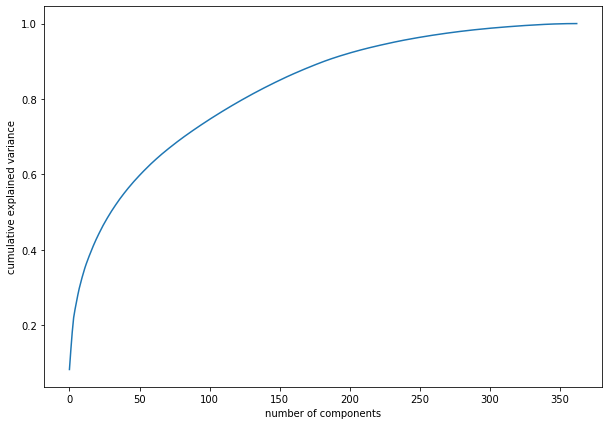

In [17]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(azdias_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
thresh = 0.9
n_comp = ((np.cumsum(azdias_pca.explained_variance_ratio_))<thresh).sum()
n_comp

182

In [19]:
azdias_pca_09 = doPCA(azdias_scaled_df, n_comp)
azdias_p_comp = azdias_pca_09.transform(azdias_scaled_df)

In [20]:
azdias_p_comp.shape

(813508, 182)

In [21]:
azdias_p_comp

array([[-5.01577052e+00,  1.54203710e+00,  6.18076630e+00, ...,
         2.12301532e-01, -1.18418027e+00,  1.45095928e-02],
       [-4.09894712e-01, -2.21244724e+00,  2.33446876e+00, ...,
        -1.32912760e-01, -5.97611546e-01, -4.96228180e-02],
       [ 3.20772474e+00, -6.68950990e+00, -6.65352003e-01, ...,
         3.29255492e-01, -4.05702050e-04,  4.59846463e-01],
       ...,
       [ 3.40261337e+00,  2.47595280e+00,  1.36438502e+00, ...,
         7.31681258e-01,  3.66758508e-01,  5.15948204e-02],
       [-7.22337057e+00,  5.78141920e+00, -3.59996863e+00, ...,
         4.88536245e-01, -1.09825618e-01,  1.23497807e-01],
       [-1.20954637e+00, -5.95097067e+00, -2.02539069e+00, ...,
         5.41826984e-02, -1.98620350e-01,  5.92485879e-01]])

In [22]:
cmp_cols = ['cmp_' + str(n) for n in range(1, n_comp+1)]
len(cmp_cols)

182

In [23]:
azdias_p_comp_df = pd.DataFrame(data = azdias_p_comp, columns = cmp_cols)

In [24]:
azdias_p_comp_df.head()

,cmp_1,cmp_2,cmp_3,cmp_4,cmp_5,cmp_6,cmp_7,cmp_8,cmp_9,cmp_10,...,cmp_173,cmp_174,cmp_175,cmp_176,cmp_177,cmp_178,cmp_179,cmp_180,cmp_181,cmp_182
0,-5.015771,1.542037,6.180766,-5.988677,0.082907,-1.422405,-5.017481,0.588008,-0.278764,1.374515,...,-1.211566,-0.864892,0.444032,-0.281754,-0.072842,-0.359791,1.130393,0.212302,-1.184180,0.014510
1,-0.409895,-2.212447,2.334469,-3.098727,4.390979,-4.530914,4.640882,-0.943745,0.770753,-1.398033,...,0.078377,-1.186278,0.079823,0.437741,-0.200641,-0.028734,-0.157356,-0.132913,-0.597612,-0.049623
2,3.207725,-6.689510,-0.665352,-2.391169,-1.028028,-0.967230,-1.524535,-1.286474,-2.436685,2.880041,...,-0.343099,0.321164,0.732141,-0.487339,1.364130,-0.272871,0.064780,0.329255,-0.000406,0.459846
3,6.204803,8.069699,4.127788,6.260512,-2.986910,2.863098,3.097898,-2.819905,-0.081129,4.942396,...,-0.528916,-1.091199,-0.834503,-0.651147,-0.397663,-0.319160,0.146202,-0.213813,-0.632749,-0.940264
4,2.153164,-3.460982,1.516365,-1.904240,1.299604,0.243500,-0.503317,-2.127939,0.451181,2.426639,...,-0.201051,0.118326,0.281615,-0.931337,-0.221103,0.143900,-0.705789,-0.592400,-0.770940,-0.036232


In [25]:
customers_p_comp = azdias_pca_09.transform(customers_scaled_df)

In [26]:
customers_p_comp_df = pd.DataFrame(data = customers_p_comp, columns = cmp_cols)

In [27]:
customers_p_comp_df.shape

(144941, 182)

In [28]:
customers_p_comp_df.head()

,cmp_1,cmp_2,cmp_3,cmp_4,cmp_5,cmp_6,cmp_7,cmp_8,cmp_9,cmp_10,...,cmp_173,cmp_174,cmp_175,cmp_176,cmp_177,cmp_178,cmp_179,cmp_180,cmp_181,cmp_182
0,3.496078,-6.630098,1.201199,-2.606521,-1.375904,2.454764,0.861596,-0.346900,0.626817,1.212288,...,0.399349,-1.199490,-0.366846,1.162755,0.626698,0.343808,-0.269546,-0.223459,-0.104526,-0.426343
1,-6.014690,-4.714947,0.797677,1.932767,-3.968988,-2.365670,0.145948,3.000735,-5.844309,2.447240,...,0.076198,0.875687,0.630398,0.903434,-1.669022,-0.606279,-0.593604,-0.697919,0.346839,-0.947990
2,1.037853,-4.240683,-3.887753,-1.782728,4.155599,2.283456,-0.372684,-4.765964,-0.792900,1.225456,...,-0.321328,1.569703,0.770158,1.089731,0.172569,-0.836487,-0.341196,-0.201050,-0.100970,-0.414222
3,-1.175464,10.673368,-0.870053,0.054865,-4.148222,-0.172088,0.811531,-0.067829,2.977882,2.674029,...,0.698685,0.219977,-1.789896,1.049138,-0.752595,-0.409495,0.566272,0.303931,-0.113560,-0.098276
4,0.273575,-4.032439,6.749950,2.144754,1.176310,1.877936,1.568755,1.047791,-3.055992,1.047136,...,-0.380784,0.048358,-0.374586,0.195923,1.004866,0.656474,0.747064,0.908245,-0.789235,0.963993


In [32]:
comp_feat = pd.DataFrame({'feature':list(azdias_clean.columns), 'weight':azdias_pca_09.components_[0]}).sort_values('weight', axis=0, ascending=False)

In [33]:
comp_feat.reset_index(inplace=True, drop=True)

In [38]:
comp_feat.head()

,feature,weight
0,PLZ8_ANTG1,0.125374
1,KBA13_ANTG1,0.125359
2,LP_STATUS_FEIN,0.124287
3,LP_STATUS_GROB,0.121454
4,MOBI_RASTER,0.120621


In [35]:
plot_df = comp_feat.head(5).append(comp_feat.tail(5))

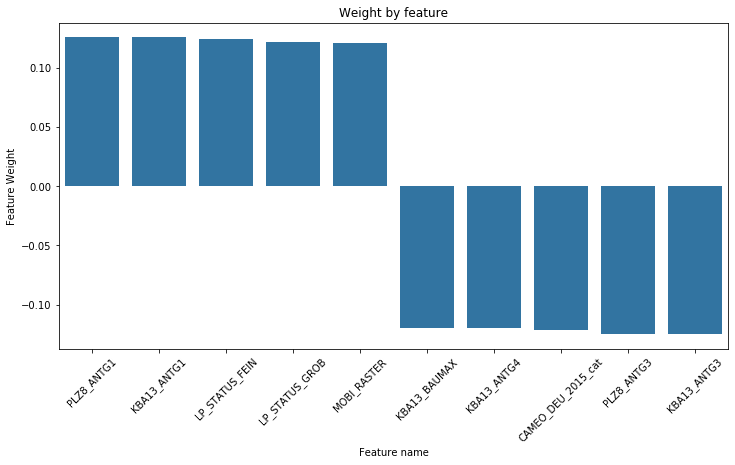

In [37]:
# plot bar chart with only the first 3 weights and the last 3 weights

plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]

sb.barplot(data=plot_df, x='feature', y='weight', color = base_color)

plt.title("Weight by feature")
plt.xlabel("Feature name")
plt.ylabel("Feature Weight")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show();

In [309]:
# find cluster size for azdias
wcss = []
for i in range(1, 16):
   print('proc cluster', i) 
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(azdias_p_comp)
   wcss.append(model.inertia_)

proc cluster 1
proc cluster 2
proc cluster 3
proc cluster 4
proc cluster 5
proc cluster 6
proc cluster 7
proc cluster 8
proc cluster 9
proc cluster 10
proc cluster 11
proc cluster 12
proc cluster 13
proc cluster 14
proc cluster 15


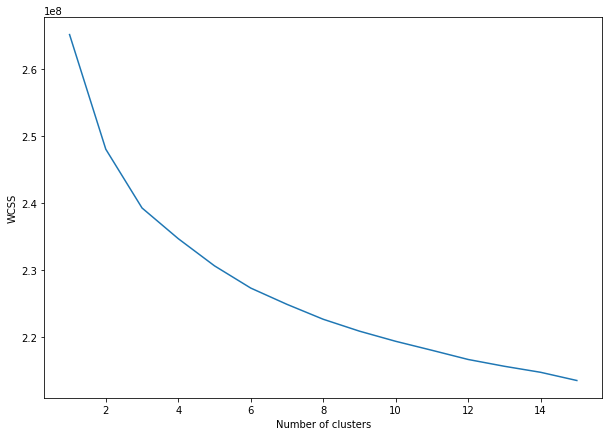

In [310]:
# plot clusters curve for 'Elbow method'
plt.figure(figsize=(10,7))
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Initialize the class object
kmeans = KMeans(n_clusters=9)
 
#predict the labels of clusters.
azdias_labels = kmeans.fit_predict(azdias_p_comp)
azdias_centers = kmeans.cluster_centers_
    
#print(azdias_labels)

In [40]:
print(len(azdias_labels))
print(len(azdias_centers))

813508
9


In [41]:
#predict the labels of clusters with azdias model
customers_labels = kmeans.predict(customers_p_comp)   
print(customers_labels)

[2 5 4 ... 5 6 3]


In [42]:
cluster, cnt = np.unique(azdias_labels, return_counts=True)
share = cnt/sum(cnt)*100
azdias_clusters_props = pd.DataFrame({'cluster':cluster, 'share':share})
azdias_clusters_props['population'] = 'gen_pop'

In [43]:
cluster, cnt = np.unique(customers_labels, return_counts=True)
share = cnt/sum(cnt)*100
cust_clusters_props = pd.DataFrame({'cluster':cluster, 'share':share})
cust_clusters_props['population'] = 'customers'

In [45]:
comb_clusters = azdias_clusters_props.append(cust_clusters_props)

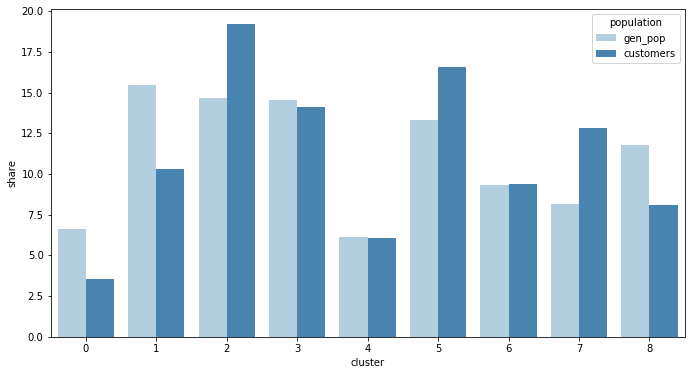

In [50]:
plt.figure(figsize = (25, 35))
base_color = sb.color_palette()[0]

plt.subplot(5, 2, 1)
sb.barplot(data=comb_clusters, x='cluster', y='share', hue='population', palette='Blues')

**Clusters Features**

In [51]:
# add clustering to the original data 
azdias_clean['cluster'] = azdias_labels
customers_clean['cluster'] = customers_labels

In [52]:
azdias_centers

array([[-5.74654290e+00,  1.65055942e+00, -5.17969718e+00, ...,
         2.19576783e-03, -1.33460997e-02,  4.29358256e-02],
       [-1.06653303e+00, -3.61119991e-02,  2.08594375e-01, ...,
         1.16853994e-02,  2.02867352e-02, -1.05333767e-02],
       [ 3.42535175e+00, -4.88177329e+00, -1.22713947e+00, ...,
        -6.96071578e-02, -4.18835454e-02,  4.06127549e-02],
       ...,
       [ 5.40568572e-01,  6.27172674e+00,  1.38355519e+00, ...,
        -1.68129171e-02, -1.94575692e-02, -1.61977988e-02],
       [ 9.60073664e-01, -3.28554963e+00,  6.97067253e+00, ...,
         8.47710143e-02,  5.12477459e-03,  1.84778849e-02],
       [-7.82338005e+00,  2.27393674e+00,  2.14325668e+00, ...,
        -4.56725065e-02,  1.01586647e-03,  1.67695388e-02]])

In [53]:
azdias_centers.shape

(9, 182)

In [60]:
cluster_weigths = azdias_pca_09.inverse_transform(azdias_centers[0])

In [61]:
cluster_feat = pd.DataFrame({'feature':list(azdias_clean.columns[:-1]), 'weight':cluster_weigths}).sort_values('weight', axis=0, ascending=False)

In [62]:
cluster_feat.reset_index(inplace=True, drop=True)

In [63]:
plot_df = cluster_feat.head(5).append(cluster_feat.tail(5))

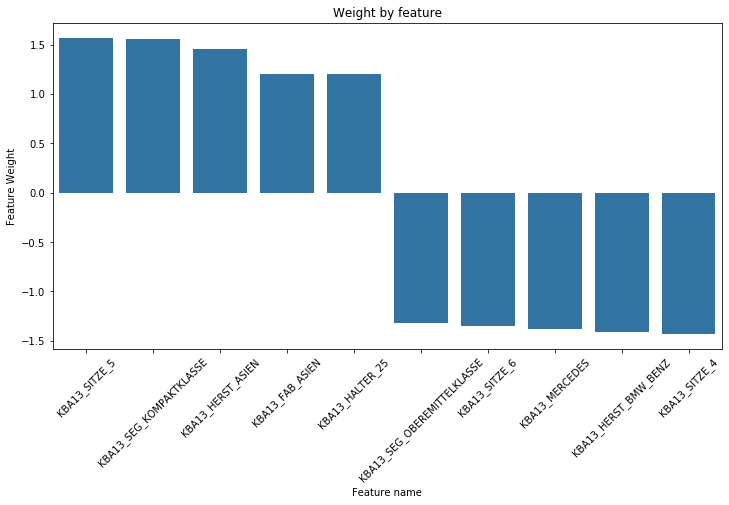

In [64]:
# plot bar chart with only the first 3 weights and the last 3 weights

plt.figure(figsize=(12,6))

sb.barplot(data=plot_df, x='feature', y='weight', color = base_color)

plt.title("Weight by feature")
plt.xlabel("Feature name")
plt.ylabel("Feature Weight")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show();

**Customer Over Representation**

In [66]:
cluster_weigths = azdias_pca_09.inverse_transform(azdias_centers[2])
cluster_features = pd.Series(cluster_weigths, index=azdias_clean.columns[:-1]).sort_values(ascending=False)
cluster_features

FINANZ_MINIMALIST        0.969582
LP_STATUS_GROB           0.888573
LP_STATUS_FEIN           0.876040
CJT_TYP_5                0.837382
KBA05_ANTG1              0.809130
                           ...   
KBA13_ANTG3             -0.751743
PRAEGENDE_JUGENDJAHRE   -0.793634
CJT_TYP_1               -0.840000
FINANZ_SPARER           -0.876223
CJT_TYP_2               -0.944498
Length: 363, dtype: float64

In [67]:
cluster_weigths = azdias_pca_09.inverse_transform(azdias_centers[5])
cluster_features = pd.Series(cluster_weigths, index=azdias_clean.columns[:-1]).sort_values(ascending=False)
cluster_features

FINANZ_VORSORGER         0.843196
RETOURTYP_BK_S           0.731810
CJT_TYP_4                0.724855
CJT_KATALOGNUTZER        0.683704
ALTERSKATEGORIE_GROB     0.682811
                           ...   
FINANZ_SPARER           -0.693457
FINANZ_ANLEGER          -0.707469
CJT_TYP_1               -0.747311
PRAEGENDE_JUGENDJAHRE   -0.859459
ONLINE_AFFINITAET       -0.899306
Length: 363, dtype: float64

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# magic word for producing visualizations in notebook
%matplotlib inline

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

In [ ]:
mailout_train.head()

In [ ]:
mailout_train.info(verbose=True)

In [ ]:
mailout_train['RESPONSE'].head()

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')

In [ ]:
set(mailout_train.columns) - set(mailout_test.columns)

**Positive response % in train data**

In [ ]:
print('{:.2f}'.format(mailout_train['RESPONSE'].sum()/mailout_train.shape[0]*100))

In [ ]:
pred_cols = ['ALTERSKATEGORIE_GROB','ANREDE_KZ', 'EWDICHTE', 'INNENSTADT', 'LP_STATUS_GROB']

In [ ]:
mailout_train_sub = mailout_train[pred_cols].fillna(0).astype(int)
mailout_test_sub = mailout_test[pred_cols].fillna(0).astype(int)

In [ ]:
mailout_train_sub.info()

In [ ]:
mailout_test_sub.info()

In [ ]:
mailout_train_sub.head()

In [ ]:
mailout_test_sub.head()

In [ ]:
mailout_train_sub['LP_STATUS_GROB'].unique()

In [ ]:
mailout_train_sub.info()

In [ ]:
mailout_train_sub.columns[0:-1]

In [ ]:
kmeans = KMeans(n_clusters=3, init = azdias_center)
t_train = azdias_pca.transform(mailout_train_sub)
t_test = azdias_pca.transform(mailout_test_sub)
train_label = kmeans.fit_predict(t_train)
test_label = kmeans.fit_predict(t_test)

In [ ]:
mailout_train_sub['cluster'] = train_label
mailout_test_sub['cluster'] = test_label

In [ ]:
mailout_train_sub.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mailout_train_sub, mailout_train['RESPONSE'], test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#clf = KNeighborsClassifier()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [ ]:
preds.sum()

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = clf.predict(X_test)

In [ ]:
preds.sum()

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test).sum()

In [ ]:
preds.shape

In [ ]:
preds.shape

In [ ]:
y_test.sum()

In [ ]:
y_train.sum()

In [ ]:
type(preds)

In [ ]:
preds.shape

In [ ]:
preds.sum()

In [ ]:
X_train.head()

In [ ]:
y_train.head()